# Task 2

Step 1: Gather/Load Data (Using sklearn.datasets is acceptable)

In [1]:
from sklearn.datasets import fetch_rcv1
rcv1 = fetch_rcv1()

Step2: Define your problem: I choose GCAT as a postive class

In [2]:
#print(rcv1.feature_names)
print(rcv1.data.shape)
print(rcv1.target_names)
print(rcv1.target.shape)

(804414, 47236)
['C11' 'C12' 'C13' 'C14' 'C15' 'C151' 'C1511' 'C152' 'C16' 'C17' 'C171'
 'C172' 'C173' 'C174' 'C18' 'C181' 'C182' 'C183' 'C21' 'C22' 'C23' 'C24'
 'C31' 'C311' 'C312' 'C313' 'C32' 'C33' 'C331' 'C34' 'C41' 'C411' 'C42'
 'CCAT' 'E11' 'E12' 'E121' 'E13' 'E131' 'E132' 'E14' 'E141' 'E142' 'E143'
 'E21' 'E211' 'E212' 'E31' 'E311' 'E312' 'E313' 'E41' 'E411' 'E51' 'E511'
 'E512' 'E513' 'E61' 'E71' 'ECAT' 'G15' 'G151' 'G152' 'G153' 'G154' 'G155'
 'G156' 'G157' 'G158' 'G159' 'GCAT' 'GCRIM' 'GDEF' 'GDIP' 'GDIS' 'GENT'
 'GENV' 'GFAS' 'GHEA' 'GJOB' 'GMIL' 'GOBIT' 'GODD' 'GPOL' 'GPRO' 'GREL'
 'GSCI' 'GSPO' 'GTOUR' 'GVIO' 'GVOTE' 'GWEA' 'GWELF' 'M11' 'M12' 'M13'
 'M131' 'M132' 'M14' 'M141' 'M142' 'M143' 'MCAT']
(804414, 103)


In [3]:
columns = rcv1.target_names

In [4]:
import numpy as np
np.where(columns=="GCAT")

(array([70]),)

Step3: Prepare Your Data (Select, Preprocess, transform to features, choose your features and explain)

In [5]:
arr = rcv1.target.toarray()

In [6]:
rowNum = arr.shape[0]

In [7]:
labels = []
for num in range(rowNum):
  target = arr[num,:][70]
  if target==1:
    labels.append(1)
  else:
    labels.append(0)

In [8]:
training_samples = 23149

X_train = rcv1.data[:training_samples]
X_test = rcv1.data[training_samples:]

y_train = labels[:training_samples]
y_test = labels[training_samples:]

Step 4: Choose a Model for classification (I choose SVM)

In [9]:
from sklearn.svm import SVC

In [10]:
clf = SVC(C=1,kernel='rbf',gamma=0.1)

## model training
clf.fit(X_train, y_train)

SVC(C=1, gamma=0.1)

Step 5: Build, Train, and Evaluate Your Model

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
print(clf.score(X_train, y_train)) 
print('Training set accuracy:', accuracy_score(y_train, clf.predict(X_train)))
print(clf.score(X_test, y_test))
y_pred = clf.predict(X_test)
print('Test set accuracy:', accuracy_score(y_test, y_pred))

0.9695019223292582
Training set accuracy: 0.9695019223292582
0.953623930420536
Test set accuracy: 0.953623930420536


In [13]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

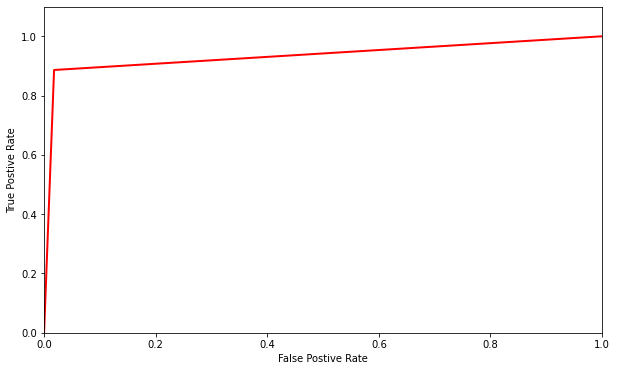

In [14]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plt.figure(figsize=(10,6))
plt.xlim(0,1)   
plt.ylim(0.0,1.1) 
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.plot(fpr,tpr,linewidth=2, linestyle="-",color='red')
plt.show()

We can see that the model performs almost well,its accuracy is 0.95 and its ROC curve performs well.

## Why I choose SVM kernel = rbf 

The RBF kernel is a non-linear kernel that maps the input features into an infinite-dimensional feature space. It is commonly used in SVMs when the data is not linearly separable.

## Ideas that I attempted that didn't work 

In the beginning, I did not use this function #arr = rcv1.target.toarray(), so there is an error: Index dimension must be <= 2. After searching it online, I found that rcv1.target is a multi-dimensional array, so I have to convert it to nto a 2-dimensional array. Then I tried 

#rcv1.target = rcv1.target.reshape(-1, 1)  
y = (rcv1.target[:, 0] ==1).astype(int)

But this did not work.
